In [42]:
import pandas as pd
import numpy as np
import matplotlib
import pylab
import sklearn
import scipy

In [43]:
from pandas import read_csv
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.datasets.samples_generator import make_regression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy import stats

In [44]:
dataset = read_csv(r'C:\Users\betha\OneDrive\Documents\CSC5220\Lab2_dataset.csv')  # importing csv
print(dataset)

    x_training  y_training   x_test    y_test    x_val      y_val
0     -15.9368      2.1343 -33.3180   3.31690 -16.7465   4.170200
1     -29.1530      1.1733 -37.9122   5.39770 -14.5775   4.067300
2      36.1895     34.3591 -51.2069   0.13043  34.5158  31.873100
3      37.4922     36.8380  -6.1326   6.19260 -47.0101  10.623700
4     -48.0588      2.8090  21.2612  17.08850  36.9751  31.836000
5      -8.9415      2.1211 -40.3195   0.79951 -40.6861   4.959400
6      15.3078     14.7103 -14.5415   2.82480  -4.4720   4.451600
7     -34.7063      2.6142  32.5598  28.62120  26.5336  22.276300
8       1.3892      3.7402  13.3934  17.04640 -42.7977  -0.000044
9     -44.3838      3.7317  44.2099  55.38440  25.3741  20.503800
10      7.0135      7.6277  -1.1427   4.07940 -31.1096   3.858300
11     22.7627     22.7524 -12.7669   8.27040  27.3118  19.365100
12         NaN         NaN  34.0545  31.32360  -3.2639   4.883800
13         NaN         NaN  39.2235  39.15910  -1.8183  11.097200
14        

In [45]:
print("Training Set: ")  # defining training set
x_training = dataset.iloc[:12, :1]  # gets rows until the 12th row and first two columns
y_training = dataset.iloc[:12, 1:2]
training_set = print(dataset[["x_training", "y_training"]])
print()

print("Test Set:")  # defining test set
x_testing = dataset.iloc[:, 2:3]  # gets all rows and next two columns
y_testing = dataset.iloc[:, 3:4]
testing_set =  print(dataset[["x_test", "y_test"]])
print()

print("Validation Set:")  # defining validation set
x_validate = dataset.iloc[:, 4:5]  # gets all rows and last two columns
y_validate = dataset.iloc[:, 5:6]
validation_set =  print(dataset[["x_val", "y_val"]])
print()

Training Set: 
    x_training  y_training
0     -15.9368      2.1343
1     -29.1530      1.1733
2      36.1895     34.3591
3      37.4922     36.8380
4     -48.0588      2.8090
5      -8.9415      2.1211
6      15.3078     14.7103
7     -34.7063      2.6142
8       1.3892      3.7402
9     -44.3838      3.7317
10      7.0135      7.6277
11     22.7627     22.7524
12         NaN         NaN
13         NaN         NaN
14         NaN         NaN
15         NaN         NaN
16         NaN         NaN
17         NaN         NaN
18         NaN         NaN
19         NaN         NaN
20         NaN         NaN

Test Set:
     x_test    y_test
0  -33.3180   3.31690
1  -37.9122   5.39770
2  -51.2069   0.13043
3   -6.1326   6.19260
4   21.2612  17.08850
5  -40.3195   0.79951
6  -14.5415   2.82480
7   32.5598  28.62120
8   13.3934  17.04640
9   44.2099  55.38440
10  -1.1427   4.07940
11 -12.7669   8.27040
12  34.0545  31.32360
13  39.2235  39.15910
14   1.9745   8.08730
15  29.6218  24.11130
16 -23

In [46]:
# Turning data sets into arrays
x = np.array(x_training.values)  # array = dataset.values
x = x[np.logical_not(np.isnan(x))]  # remove nan values from my array
# print(x)
# print()

y = np.array(y_training.values)
y = y[np.logical_not(np.isnan(y))]  # remove nan values from my array
# print(y)
# print()

x_test = np.array(x_testing.values)
# print(x_test)
# print()

y_test = np.array(y_testing.values)
# print(y_test)
# print()

x_val = np.array(x_validate.values)
# print(x_val)
# print()

y_val = np.array(y_validate.values)
# print(y_val)
# print()

In [47]:
print("Training Data:")
print()

print(x)
print()
print(y)

Training Data:

[-15.9368 -29.153   36.1895  37.4922 -48.0588  -8.9415  15.3078 -34.7063
   1.3892 -44.3838   7.0135  22.7627]

[ 2.1343  1.1733 34.3591 36.838   2.809   2.1211 14.7103  2.6142  3.7402
  3.7317  7.6277 22.7524]


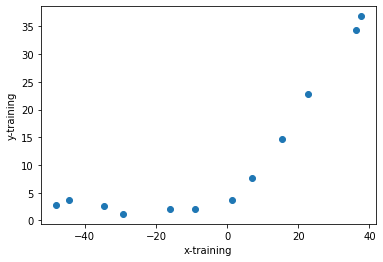

In [48]:
x_train = dataset['x_training'].tolist()
y_train = dataset['y_training'].tolist()
plt.scatter(x_train, y_train)
plt.xlabel('x-training')  # labels x-axis
plt.ylabel('y-training')  # labels y-axis
plt.show()  # displays scatter plot

In [49]:
def gradient_descent(alpha, x, y, lamb=0, conv=0.0001, max_iter=10000): # input alpha=learning rate, x and = data,
    converged = False                                                   #  convergence thresh= 0.0001, max_iter = 10000
    iteration = 0
    m = x.shape[0] # number of samples

    # initial theta
    t_n = ([0.0,0.0])
    num_thetas = len(t_n)
#     t0 = np.random.random(x.shape[1])
#     t1 = np.random.random(x.shape[1])

    # total error, J(theta)
    J = sum([(t_n[0] + t_n[1]*x[i] - y[i])**2 for i in range(m)]) + (lamb * sum(t_n[i] ** 2 for i in range(num_thetas)))

    # Iterate Loop
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0/m * sum([(t_n[0] + t_n[1]*x[i] - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t_n[0] + t_n[1]*x[i] - y[i])*x[i] for i in range(m)])

        # update the theta_temp
        temp0 = t_n[0] - alpha * grad0
        temp1 = ((1.0 -((alpha * lamb)/m)) * t_n[1]) - alpha * grad1
    
        # update theta
        t_n[0] = (temp0)
        t_n[1] = (temp1)

        # mean squared error
        e = sum([ (t_n[0] + t_n[1]*x[i] - y[i])**2 for i in range(m)]) + (lamb * sum([t_n[i]**2 for i in range(num_thetas)])) 
        
        if abs(J-e) <= conv:
            print('Converged, iterations: ', iteration, '!!!')
            converged = True
    
        J = e   # update error 
        iteration += 1  # update iter
    
        if iteration == max_iter:
            print('Max interactions exceeded!')
            converged = True
    
    print(t_n, iteration-1, "iterations")
            
    for i in range(num_thetas):
        y_predict = t_n[0] + t_n[1]*x

    plt.plot(x, y, 'o', label = "original data")
    plt.plot(x, y_predict, label = "predicted data")
    plt.xlabel('x')  # labels x-axis
    plt.ylabel('y')  # labels y-axis
    plt.legend(loc = "best")
    plt.show()

    return t_n[0], t_n[1]

Converged, iterations:  5445 !!!
[13.021432891787487, 0.36738026698713894] 5445 iterations


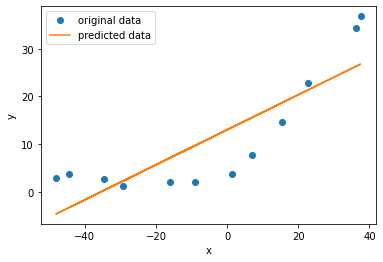

13.021432891787487 0.36738026698713894


In [50]:
theta0, theta1= gradient_descent(0.001, x, y)
print (theta0, theta1)

In [55]:
def work_properly(alpha, x, y, lamb=0, conv=0.0001, max_iter=10000): # input alpha=learning rate, x and = data,
    converged = False                                                   #  convergence thresh= 0.0001, max_iter = 10000
    iteration = 0
    m = x.shape[0] # number of samples

    # initial theta
    t_n = ([0.0,0.0])
    num_thetas = len(t_n)

    # total error, J(theta)
    J = sum([(t_n[0] + t_n[1]*x[i] - y[i])**2 for i in range(m)]) + (lamb * sum(t_n[i] ** 2 for i in range(num_thetas)))

    # Iterate Loop
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0/m * sum([(t_n[0] + t_n[1]*x[i] - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t_n[0] + t_n[1]*x[i] - y[i])*x[i] for i in range(m)])

        # update the theta_temp
        temp0 = t_n[0] - alpha * grad0
        temp1 = ((1.0 -((alpha * lamb)/m)) * t_n[1]) - alpha * grad1
    
        # update theta
        t_n[0] = (temp0)
        t_n[1] = (temp1)

        # mean squared error
        e = sum([ (t_n[0] + t_n[1]*x[i] - y[i])**2 for i in range(m)]) + (lamb * sum([t_n[i]**2 for i in range(num_thetas)])) 
        
        if abs(J-e) <= conv:
            converged = True
    
        J = e   # update error 
        iteration += 1  # update iter
    
        if iteration == max_iter:
            print('Max interactions exceeded!')
            converged = True
        
        for i in range(num_thetas):
            y_predict = t_n[0] + t_n[1]*x

            plt.plot(iteration, J, 'o', label = "original data")
            plt.xlabel('Iterations')  # labels x-axis
            plt.ylabel('J theta')  # labels y-axis


    return J, iteration-1

(537.024955872586, 5445)


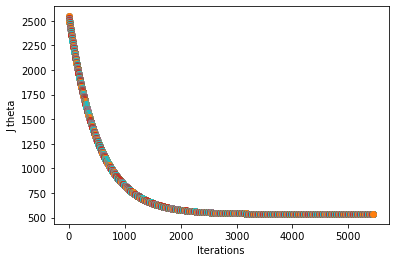

In [56]:
results= work_properly(0.001, x, y)
print (results)

In [53]:
print("Predicted Values:")

def regression_func(t0, t1, x):
    f_theta = t0
    f_theta += t1*x
    return f_theta

predicted_values = []

for i in np.nditer(x):
    predicted_value = regression_func(theta0, theta1, i)
    predicted_values.append(predicted_value)
print(predicted_values)

Predicted Values:
[7.166567052866852, 2.3111959683114254, 26.316741063918553, 26.795327337722696, -4.634421883294024, 9.736502234521986, 18.645216542773213, 0.27102313165174685, 13.531797558686021, -3.2842994021162895, 15.598054394301787, 21.383999695135635]


In [57]:
def evaluate_func(pred, y):
    m = x.shape[0]
    MSE = (1/(2*m))*sum([(pred[i]-y[i])**2 for i in range(m)])
    return MSE
              
evaluation = evaluate_func(predicted_values, y)
print("MSE:", evaluation)

MSE: 22.376039828024417
